# Proyecto 3

## Aprendizaje Colaborativo Internacional en Línea

Esta tarea se encuentra en el marco de la aplicación del programa de Aprendizaje Colaborativo Internacional en Línea (COIL – siglas en inglés de “Collaborative Online International Learning”) de la Asociación de Universidades Confiadas a la Compañía de Jesús en América Latina (AUSJAL).

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sympy.abc import alpha

### Países: 

México, India, Canadá, Uruguay

### Categoría de Dominio: 

Indicadores económicos y financieros que incluyen márgenes de utilidad, productividad, innovación, sostenibilidad, empleo, e inversión.

### Pregunta: 

¿Cómo influye la tasa de desempleo en el PIB?

### Fuentes:

[Inflation, Interest Rate and Unemployment](https://www.kaggle.com/code/kimmik123/inflation-interest-rate-and-unemployment/input)

> Notas sobre la India.
> 
> En los dataset encontrados no se encuentran datos de todos los años de la tasa de desempleo, por eso en el gráfico se muestran puntos aislados 

## Obtención del dataset


Convertimos el archivo de datos en un dataset legible, de todos los países desde el año 1970 al 2021

In [207]:
world = pd.read_csv("C:\\Users\\Usuario\\AppData\\Roaming\\JetBrains\\PyCharm2024.2\\extensions\\com.intellij.database\\data\\inflation interest unemployment.csv")
world

,country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
0,Afghanistan,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
1,Afghanistan,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
2,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
3,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
4,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,Zimbabwe,2017,0.893962,2.437608,4.370035,3.274167,6.914167,NaN,4.785,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income
13828,Zimbabwe,2018,10.618866,59.803356,-32.960315,2.532500,7.131667,NaN,4.796,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income
13829,Zimbabwe,2019,255.304991,440.829791,-78.517887,2.975000,16.181667,16.860001,4.833,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income
13830,Zimbabwe,2020,557.201817,558.560024,-79.803157,4.518333,33.008333,NaN,5.351,ZWE,ZW,Sub-Saharan Africa (excluding high income),Lower middle income


## Filtramos los datos y los años de estudio

Los datos son: 

- El nombre del país
- Año
- Crecimiento del PBI
- Tasa de desempleo

También se restringió el rango de años, para que comience en el año 2000

In [208]:
df = world[["country", "year", "Inflation, GDP deflator (annual %)", "Unemployment, total (% of total labor force) (national estimate)"]]

año_inicio = 2000
df = df[df['year'] >= año_inicio]
df

,country,year,"Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)"
30,Afghanistan,2000,NaN,NaN
31,Afghanistan,2001,NaN,NaN
32,Afghanistan,2002,NaN,NaN
33,Afghanistan,2003,11.655238,NaN
34,Afghanistan,2004,11.271432,NaN
...,...,...,...,...
13827,Zimbabwe,2017,2.437608,NaN
13828,Zimbabwe,2018,59.803356,NaN
13829,Zimbabwe,2019,440.829791,16.860001
13830,Zimbabwe,2020,558.560024,NaN


### En este espacio se muestran los datos de la India

In [210]:
india_df = df[df["country"] == 'India']
india_df.head(22)

,country,year,"Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)"
5802,India,2000,3.644970,2.73
5803,India,2001,3.215616,NaN
5804,India,2002,3.715684,NaN
5805,India,2003,3.867798,NaN
5806,India,2004,5.725413,NaN
5807,India,2005,5.621903,2.42
5808,India,2006,8.400938,NaN
5809,India,2007,6.944418,NaN
5810,India,2008,9.193970,NaN
5811,India,2009,7.040365,NaN


## Creación del gráfico

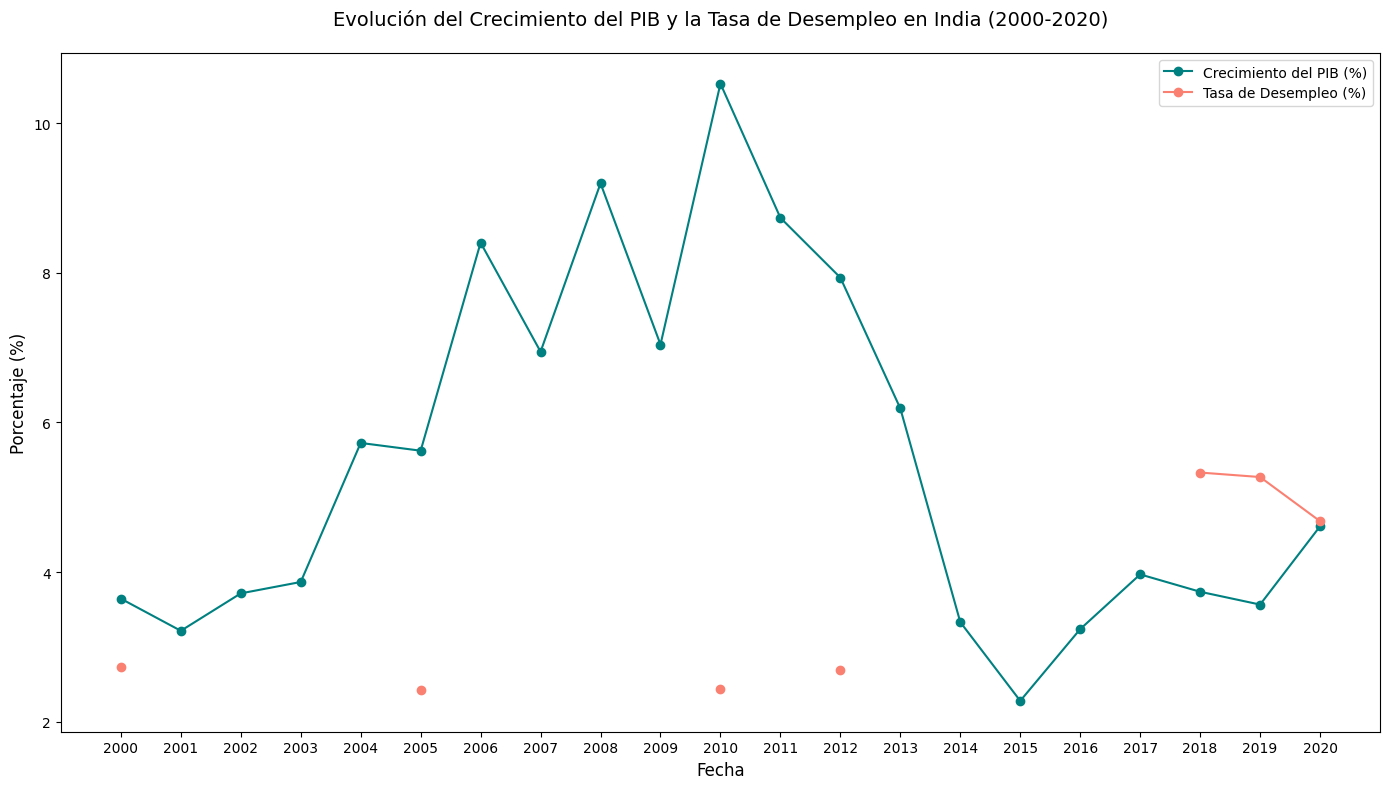

In [217]:
india_df = df[df["country"] == 'India']

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Graficar la tasa de crecimiento del PIB
plt.plot(india_df["year"], india_df["Inflation, GDP deflator (annual %)"], label='Crecimiento del PIB (%)', marker='o', color='teal')

# Graficar la tasa de desempleo
plt.plot(india_df['year'], india_df["Unemployment, total (% of total labor force) (national estimate)"], label='Tasa de Desempleo (%)', marker='o', color='salmon')

# Titulo y etiquetas
plt.title('Evolución del Crecimiento del PIB y la Tasa de Desempleo en India (2000-2020)', fontsize=14, pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
intervalo = np.arange(2000,2021,1)
plt.xticks(intervalo)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Datos de Uruguay

In [212]:
uruguay_df = df[df["country"] == 'Uruguay']
uruguay_df.head(22)

,country,year,"Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)"
13290,Uruguay,2000,3.539308,12.63
13291,Uruguay,2001,4.826618,15.05
13292,Uruguay,2002,12.616277,16.65
13293,Uruguay,2003,16.541635,16.66
13294,Uruguay,2004,10.105056,12.98
13295,Uruguay,2005,0.677868,12.01
13296,Uruguay,2006,6.533335,10.84
13297,Uruguay,2007,9.417473,9.40
13298,Uruguay,2008,8.023536,8.03
13299,Uruguay,2009,7.747542,7.74


## Creación del gráfico

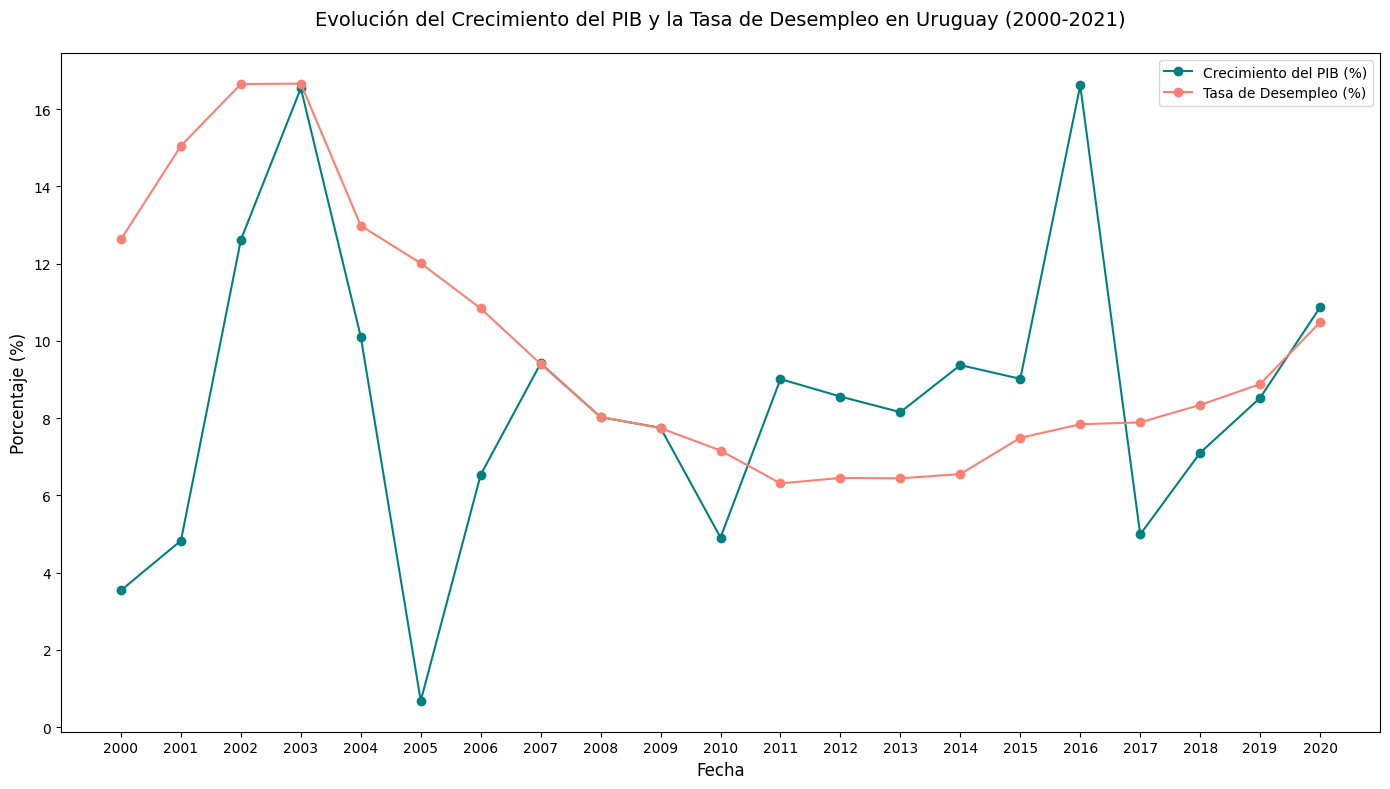

In [213]:
uruguay_df = df[df["country"] == 'Uruguay']

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Graficar la tasa de crecimiento del PIB
plt.plot(uruguay_df["year"], uruguay_df["Inflation, GDP deflator (annual %)"], label='Crecimiento del PIB (%)', marker='o',
         color='teal')

# Graficar la tasa de desempleo
plt.plot(uruguay_df['year'], uruguay_df["Unemployment, total (% of total labor force) (national estimate)"],
         label='Tasa de Desempleo (%)', marker='o', color='salmon')

# Titulo y etiquetas
plt.title('Evolución del Crecimiento del PIB y la Tasa de Desempleo en Uruguay (2000-2021)', fontsize=14, pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12, )
intervalo = np.arange(2000,2021,1)
plt.xticks(intervalo)
plt.legend()
plt.grid(visible=False) 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Datos de Canada

In [214]:
canada_df = df[df["country"] == 'Canada']
canada_df.head(22)

,country,year,"Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)"
2006,Canada,2000,4.593832,6.83
2007,Canada,2001,2.044026,7.22
2008,Canada,2002,0.843484,7.66
2009,Canada,2003,1.255872,7.57
2010,Canada,2004,2.444374,7.19
2011,Canada,2005,1.363187,6.76
2012,Canada,2006,1.065703,6.32
2013,Canada,2007,-1.357275,6.04
2014,Canada,2008,3.983739,6.14
2015,Canada,2009,-2.311525,8.34


## Creación del gráfico

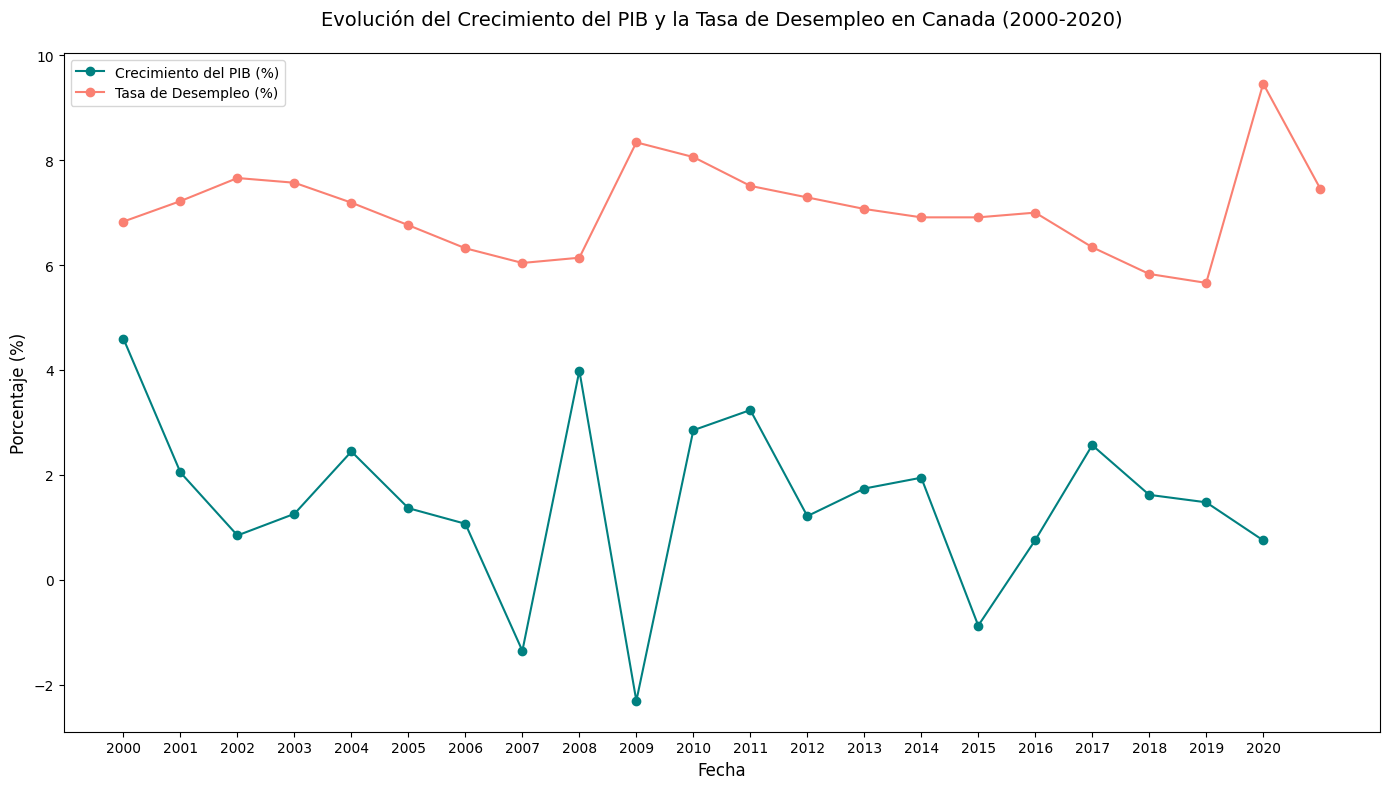

In [222]:
canada_df = df[df["country"] == 'Canada']

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Graficar la tasa de crecimiento del PIB
plt.plot(canada_df["year"], canada_df["Inflation, GDP deflator (annual %)"], label='Crecimiento del PIB (%)', marker='o',
         color='teal')

# Graficar la tasa de desempleo
plt.plot(canada_df['year'], canada_df["Unemployment, total (% of total labor force) (national estimate)"],
         label='Tasa de Desempleo (%)', marker='o', color='salmon')

# Titulo y etiquetas
plt.title('Evolución del Crecimiento del PIB y la Tasa de Desempleo en Canada (2000-2020)', fontsize=14, pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
intervalo = np.arange(2000,2021,1)
plt.xticks(intervalo)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Datos de Mexico

In [224]:
mexico_df = df[df["country"] == 'Mexico']
mexico_df.head(22)

,country,year,"Inflation, GDP deflator (annual %)","Unemployment, total (% of total labor force) (national estimate)"
8194,Mexico,2000,11.152206,2.65
8195,Mexico,2001,6.041490,2.63
8196,Mexico,2002,5.503366,3.00
8197,Mexico,2003,4.039456,3.46
8198,Mexico,2004,7.961711,3.94
8199,Mexico,2005,5.873921,3.56
8200,Mexico,2006,6.389222,3.57
8201,Mexico,2007,5.789061,3.63
8202,Mexico,2008,6.172512,3.87
8203,Mexico,2009,3.947663,5.36


## Creación del gráfico

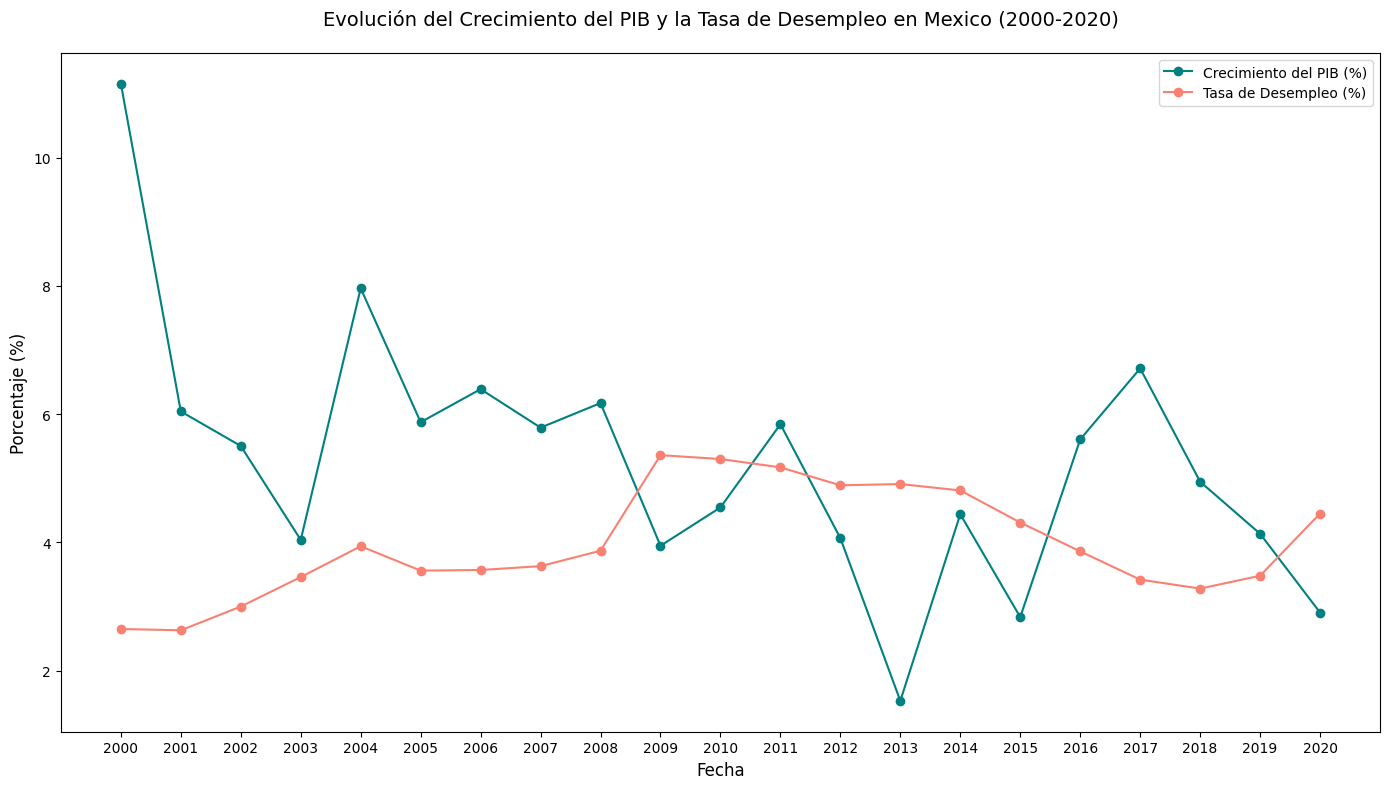

In [226]:
mexico_df = df[df["country"] == 'Mexico']

# Crear el gráfico
plt.figure(figsize=(14, 8))

# Graficar la tasa de crecimiento del PIB
plt.plot(mexico_df["year"], mexico_df["Inflation, GDP deflator (annual %)"], label='Crecimiento del PIB (%)',
         marker='o',
         color='teal')

# Graficar la tasa de desempleo
plt.plot(mexico_df['year'], mexico_df["Unemployment, total (% of total labor force) (national estimate)"],
         label='Tasa de Desempleo (%)', marker='o', color='salmon')

# Titulo y etiquetas
plt.title('Evolución del Crecimiento del PIB y la Tasa de Desempleo en Mexico (2000-2020)', fontsize=14, pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
intervalo = np.arange(2000,2021,1)
plt.xticks(intervalo)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Espacio para que realicen una conclusión